In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric, \
    plot_binned_metric_vs_mean_metric, plot_two_metrics_with_mean, plot_two_metrics_with_mean_multi_ep, plot_two_ann_metrics_train_test,plot_mean_r2_bars,\
    plot_two_ann_metrics_begining_end, plot_two_metrics_by_ephoc
import joblib

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]


In [2]:
results_path = "/Volumes/noamaz/modularity/teach_archs/retina"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '4'

dim1, dim2, dim_3 = [6, 4, 2]
dims = [6, 6, 4, 2, 2]
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/retina_multi_archs/retina_{num_layers}_layers_{dim1}_{dim2}_{dim_3}"

In [4]:
first_analsis_csv_name = f'2023-08-29-14-58-53_all_results_from_teach_archs_results_inf_eph_with_motifs_inf_eph.csv'
first_analsis = pd.read_csv(f"{results_path}/{first_analsis_csv_name}")

first_analsis['sum_motifs_count'] = first_analsis['motifs_count_0'] + \
                                    first_analsis['motifs_count_1'] + \
                                    first_analsis['motifs_count_2']


In [6]:
first_analsis = first_analsis.rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)

first_analsis['sum_motifs_count'] = first_analsis['motifs_count_0'] + \
                                    first_analsis['motifs_count_1'] + \
                                    first_analsis['motifs_count_2']

In [15]:
reg_res_path = f"/Volumes/noamaz/modularity/retina/retina_{num_layers}_layers_{dim1}_{dim2}_{dim_3}/10000_ep/teach_archs_regression_results"
p = [
    'retina_2023-08-29-16-16-05_lr_0.001_bs_512_output_adj_False_meta_True_inf_eph_2k_ephoc.csv',
    'retina_2023-08-29-16-16-05_lr_0.005_bs_512_output_adj_False_meta_True_inf_eph_2k_ephoc.csv',
    'retina_2023-08-29-16-16-05_lr_0.001_bs_512_output_adj_True_meta_True_inf_eph_2k_ephoc.csv',
    'retina_2023-08-29-16-16-05_lr_0.005_bs_512_output_adj_True_meta_True_inf_eph_2k_ephoc.csv',
]
results = [
    pd.read_csv(f"{reg_res_path}/{path}")
    for path in p
]

names = [
    'lr 0.001 all meta',
    'lr 0.005 all meta',
    'lr 0.001 all meta and adj',
    'lr 0.005 all meta and adj',
]

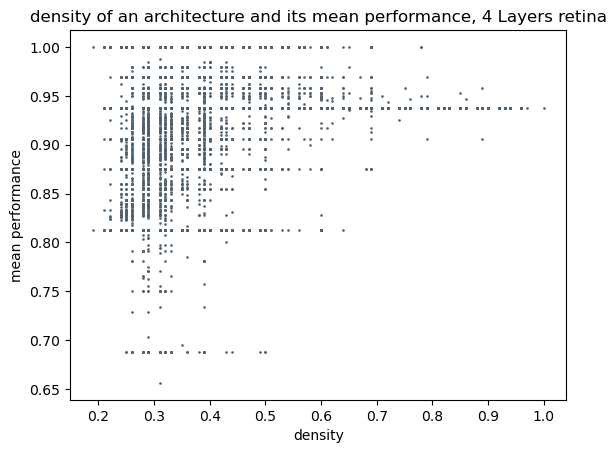

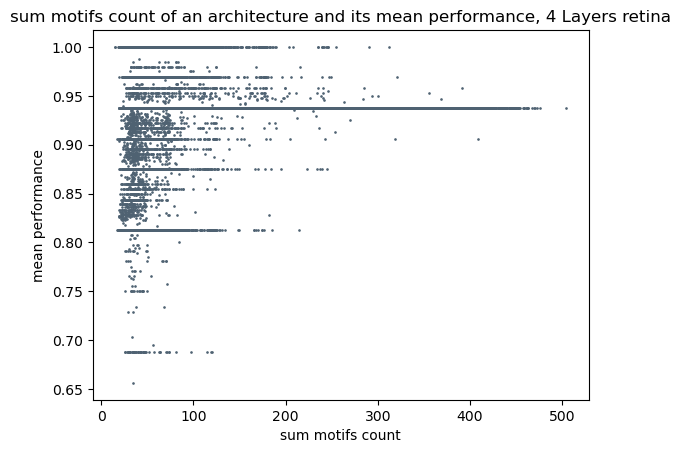

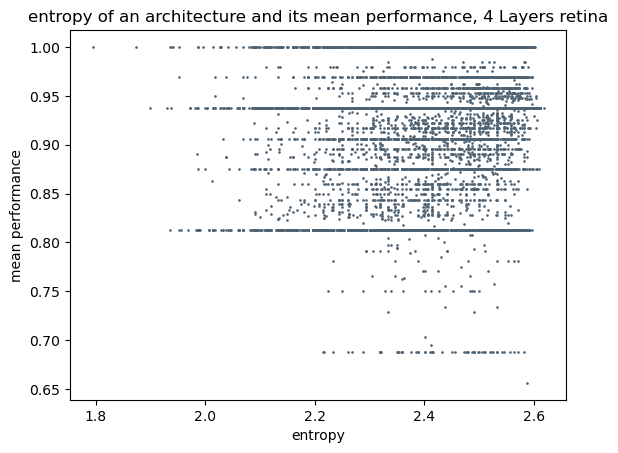

In [8]:
for x_metric_name, y_metric_name in [
    ('density', 'mean_performance'),
    ('sum_motifs_count', 'mean_performance'),
    ('entropy', 'mean_performance'),
]:
    plot_two_metrics(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        result_df=first_analsis,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition='_multi_archs',
        title_addition=f'{num_layers} Layers ',
        mark_size=0.8,
    )

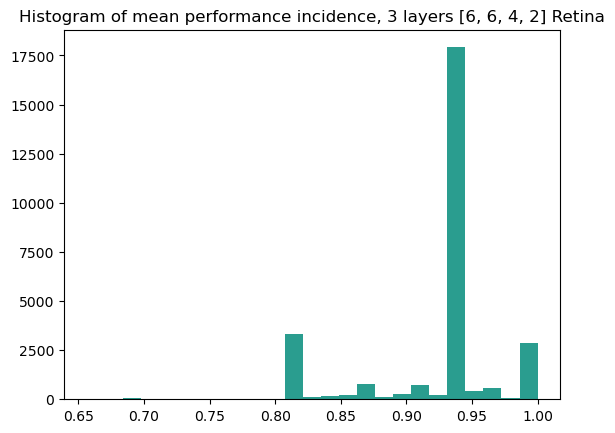

In [9]:

plt.figure()
plt.hist(first_analsis['mean_performance'], bins=25, color=COLORS[-3])
plt.title(f'Histogram of mean performance incidence, 3 layers [6, {dim1}, {dim2}, 2] Retina')
plt.savefig(
    f"{plot_path}/{time_str}_mean_performance_hist.png")
plt.show()

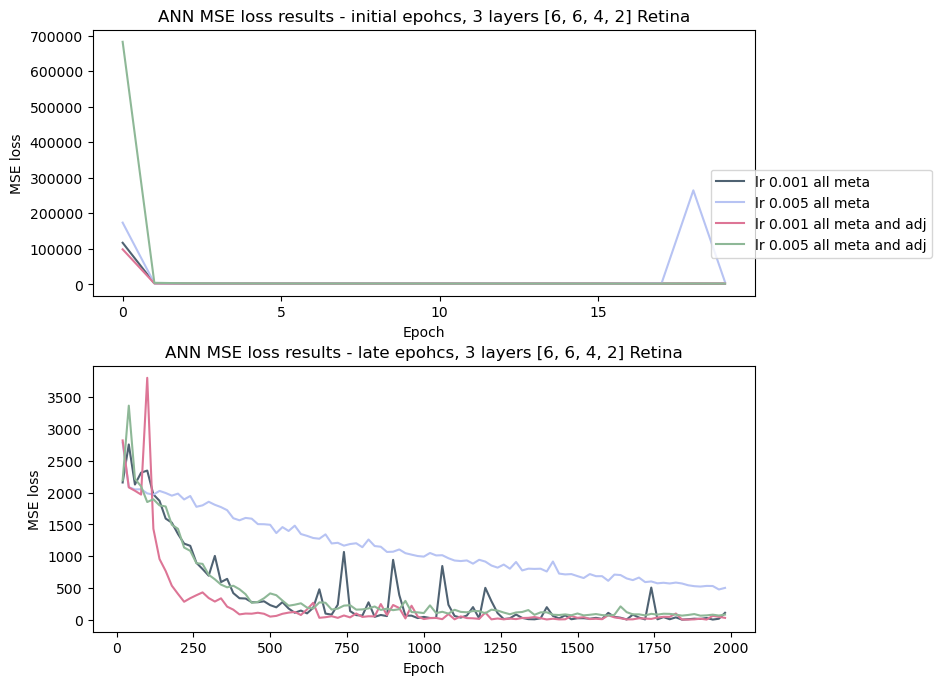

In [16]:
n = 20
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))
for i, (name, res) in enumerate(zip(names, results)):
    ax1.plot(res['Epoch'][:n], res['losses'][:n], label=f'{name}', c=COLORS[i])
    ax2.plot(res['Epoch'][n::20], res['losses'][n::20], label=f'{name}', c=COLORS[i])
ax1.set_title(f'ANN MSE loss results - initial epohcs, 3 layers [6, {dim1}, {dim2}, 2] Retina')
ax2.set_title(f'ANN MSE loss results - late epohcs, 3 layers [6, {dim1}, {dim2}, 2] Retina')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('MSE loss')
ax2.set_ylabel('MSE loss')
ax1.set_xticks(np.arange(n)[::5])
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.1, 0.5))
plt.savefig(
    f"{plot_path}/{time_str}_loss_ANN.png")
plt.show()

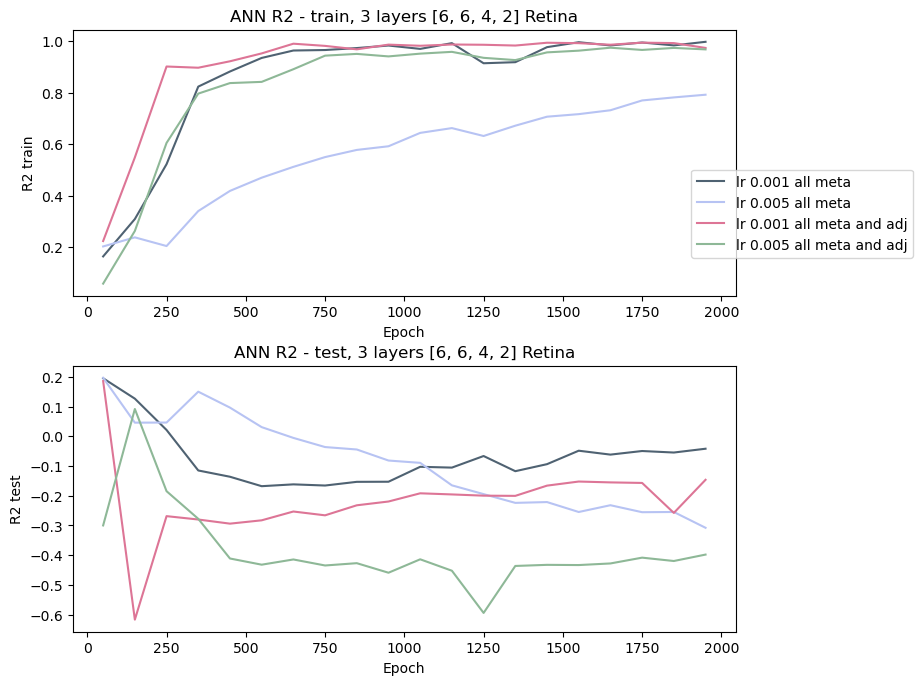

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))
for i, (name, res) in enumerate(zip(names, results)):
    #ax1.plot(res['Epoch'][500::100], res['r2s train'][500::100], label=f'{name}', c=COLORS[i])
    #ax2.plot(res['Epoch'][500::100], res['r2s test'][500::100], label=f'{name}', c=COLORS[i])
    ax1.plot(res['Epoch'][50:][::100], res['r2s train'][50:][::100], label=f'{name}', c=COLORS[i])
    ax2.plot(res['Epoch'][50:][::100], res['r2s test'][50:][::100], label=f'{name}', c=COLORS[i])
ax1.set_title(f'ANN R2 - train, 3 layers [6, {dim1}, {dim2}, 2] Retina')
ax2.set_title(f'ANN R2 - test, 3 layers [6, {dim1}, {dim2}, 2] Retina')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('R2 train')
ax2.set_ylabel('R2 test')
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.1, 0.5))
plt.savefig(
    f"{plot_path}/{time_str}_r2_ANN.png")
plt.show()

In [3]:
res_folder = f"/Volumes/noamaz/modularity/retina/retina_{num_layers}_layers_{dim1}_{dim2}_{dim_3}/first_analysis_results"
epochs = []
all_first_analsis = []
for file_name in sorted(os.listdir(res_folder)):
    ep = int(file_name.split('_')[-2])
    if ep == 100:
        continue
    epochs.append(ep)
    first_analsis = pd.read_csv(f"{res_folder}/{file_name}")
    all_first_analsis.append(first_analsis.rename(
        columns={'connectivity_ratio': 'density',
                 }).sort_values('mean_performance', ascending=False)
                             )


In [4]:
all_first_analsis = [x for _, x in sorted(zip(epochs, all_first_analsis))]
epochs = sorted(epochs)

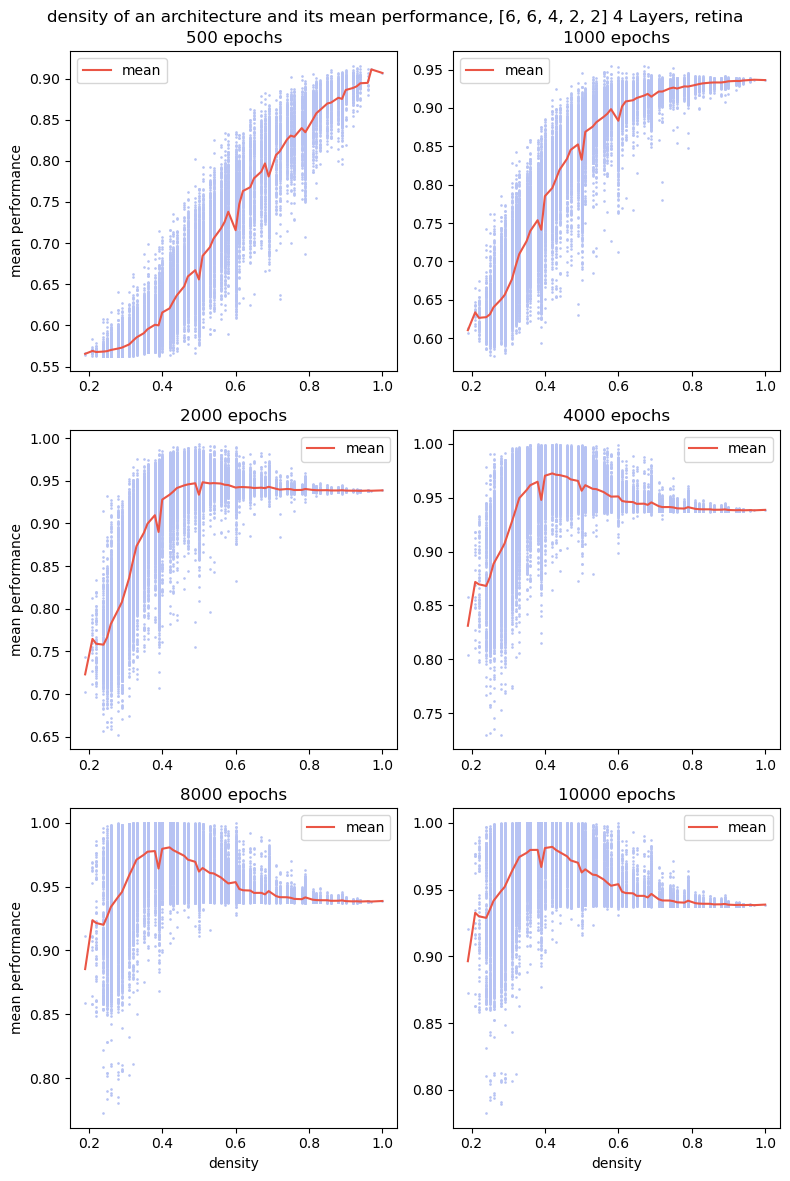

In [5]:
x_metric_name, y_metric_name = ('density', 'mean_performance')
plot_two_metrics_with_mean_multi_ep(
    x_metric_name=x_metric_name,
    y_metric_name=y_metric_name,
    all_result_df=all_first_analsis,
    epochs=epochs,
    task=task,
    time_str=time_str,
    plot_path=plot_path,
    name_addition=f'_multi_archs',
    title_addition=f'{num_layers} Layers, ',
    mark_size=0.8,
    color_ind=1,
    dims=dims
)

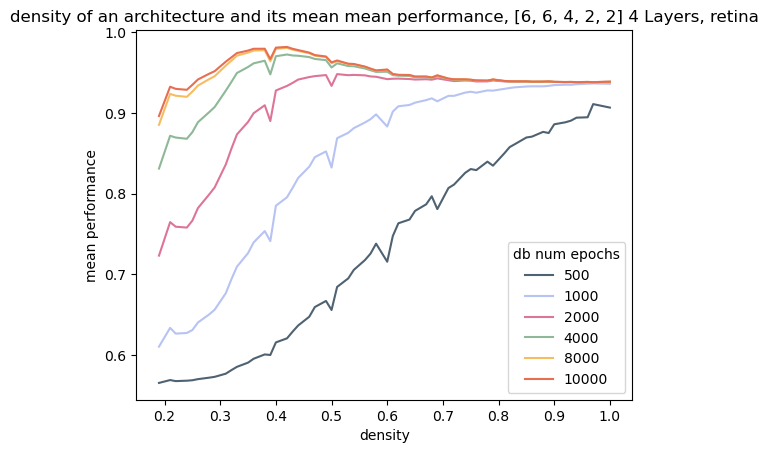

In [6]:
plot_two_metrics_by_ephoc(
    x_metric_name=x_metric_name,
    y_metric_name=y_metric_name,
    all_result_df=all_first_analsis,
    epochs=epochs,
    task=task,
    time_str=time_str,
    plot_path=plot_path,
    title_addition=f'{num_layers} Layers, ',
    dims=dims,
)

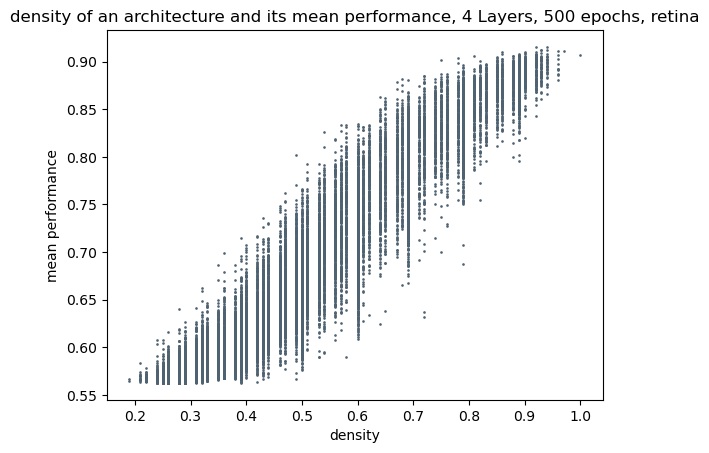

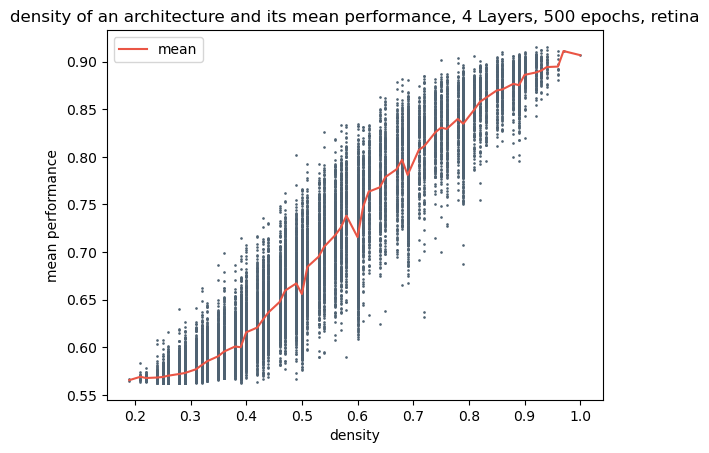

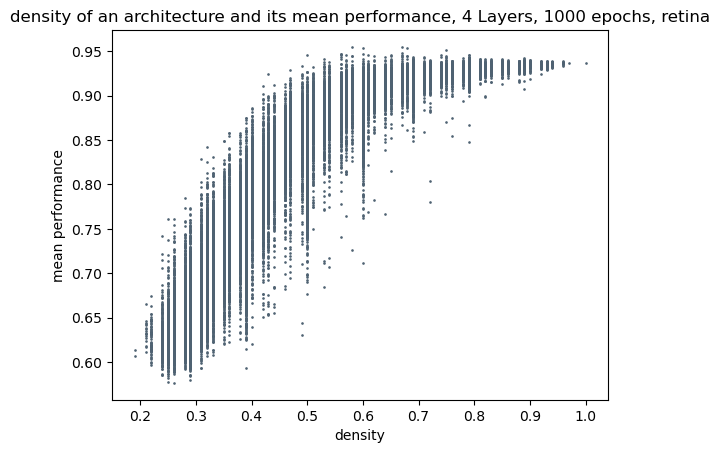

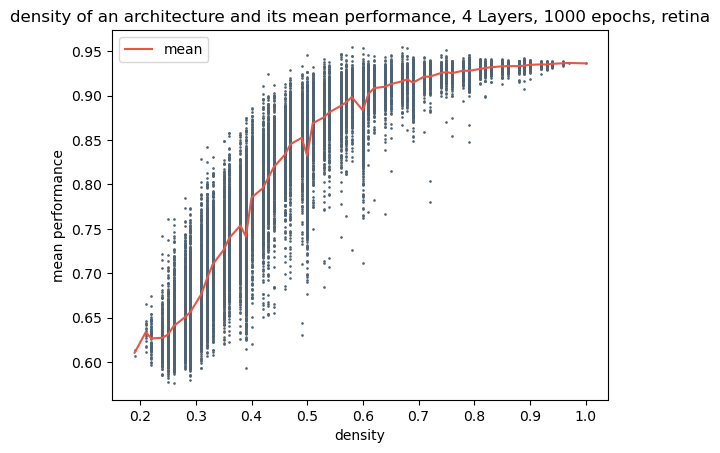

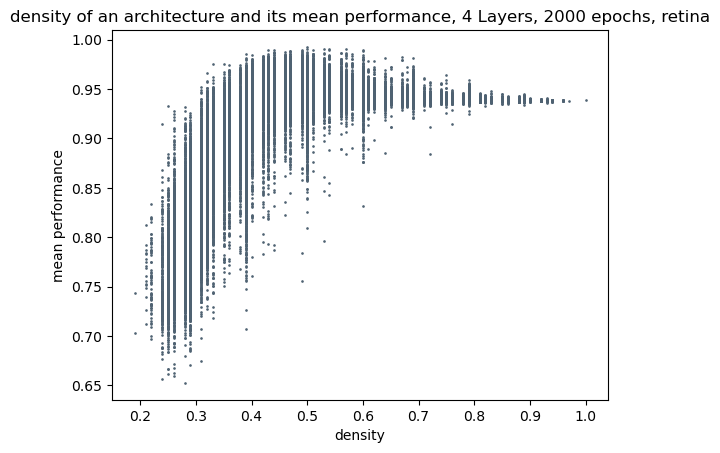

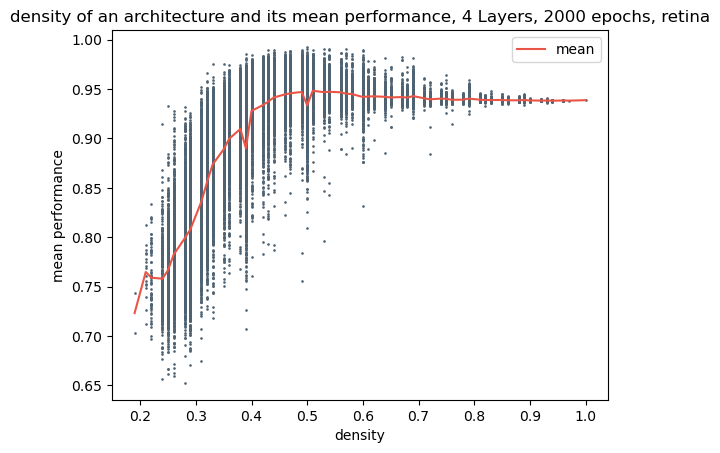

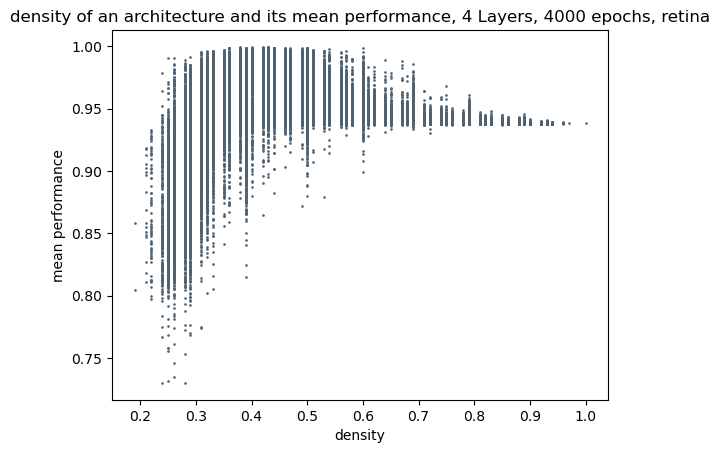

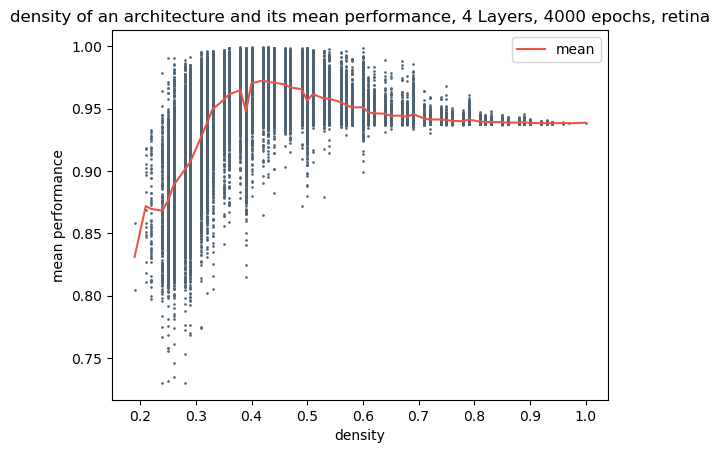

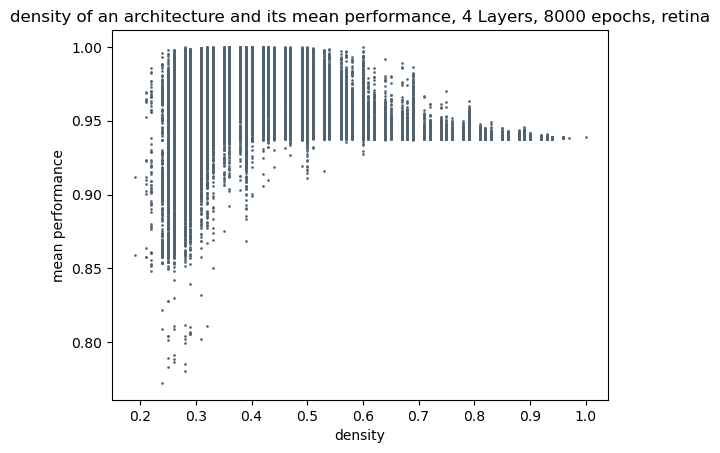

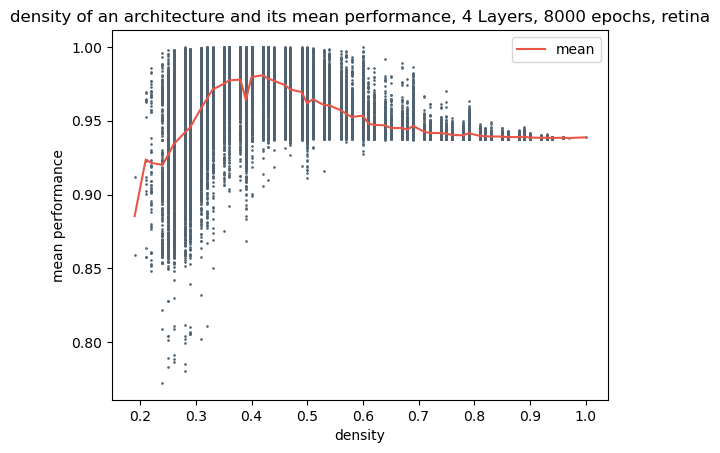

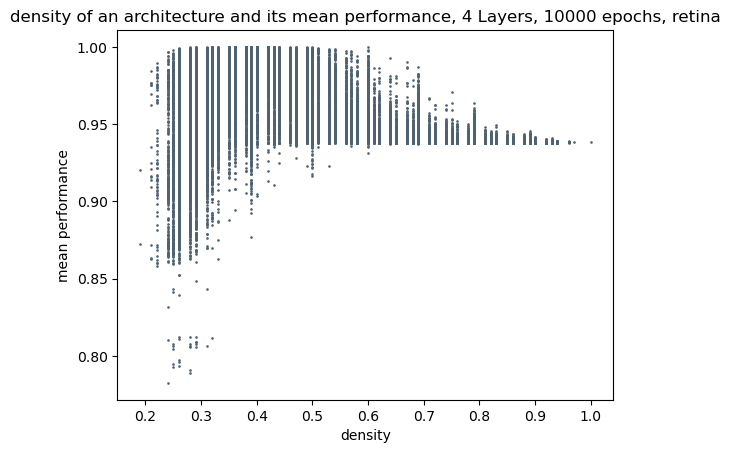

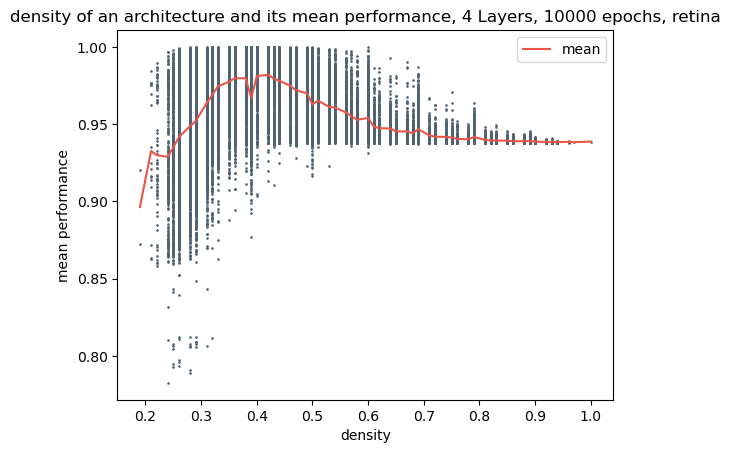

In [7]:
for ep, first_analsis in zip(epochs, all_first_analsis):
    x_metric_name, y_metric_name = ('density', 'mean_performance')
    plot_two_metrics(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        result_df=first_analsis,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition=f'_multi_archs_{ep}_ep',
        title_addition=f'{num_layers} Layers, {ep} epochs, ',
        mark_size=0.8,
    )
    plot_two_metrics_with_mean(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        result_df=first_analsis,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition=f'_multi_archs_{ep}_ep',
        title_addition=f'{num_layers} Layers, {ep} epochs, ',
        mark_size=0.8,
    )

In [3]:
ann_reg_res_folder = f"/Volumes/noamaz/modularity/retina/retina_{num_layers}_layers_{dim1}_{dim2}_{dim_3}/teach_archs_regression_results"
epochs = []
all_ann_reg_res = []
for file_name in sorted(os.listdir(ann_reg_res_folder)):
    if '.csv' not in file_name:
        continue
    ep = int(file_name.split('_')[-2])
    if ep in epochs:
        continue
    epochs.append(ep)
    ann_reg_res = pd.read_csv(f"{ann_reg_res_folder}/{file_name}")
    all_ann_reg_res.append(ann_reg_res)

In [4]:
all_ann_reg_res = [x for _, x in sorted(zip(epochs, all_ann_reg_res))]
epochs = sorted(epochs)

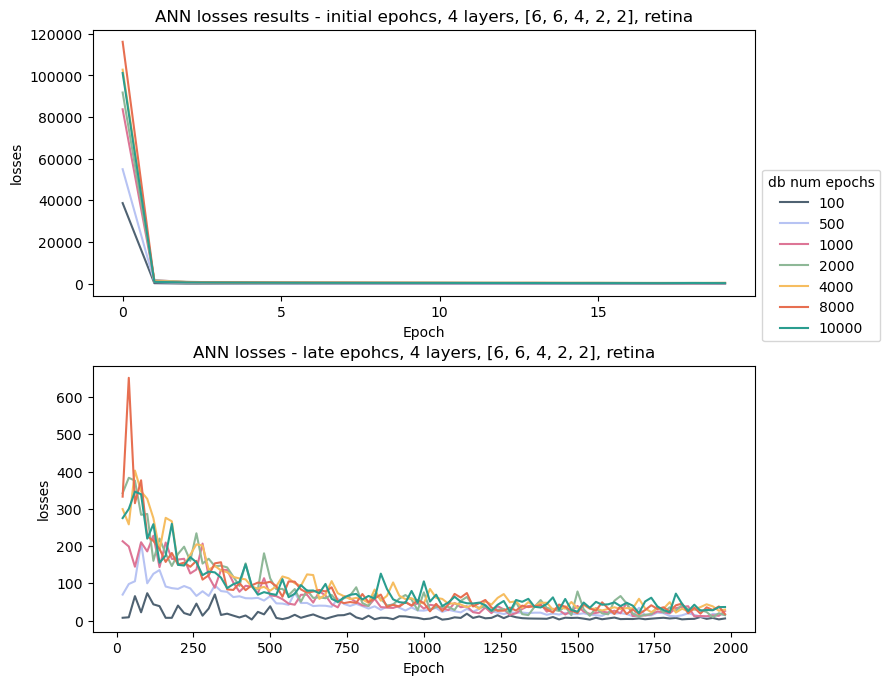

In [10]:

plot_two_ann_metrics_begining_end(
    x_metric_name='Epoch',
    y_metric_name='losses',
    all_result_list=all_ann_reg_res,
    epochs=epochs,
    dims=dims,
    time_str=time_str,
    task=task,
    plot_path=plot_path,
    title_addition=f'{num_layers} layers',
    time_split_ind=20,
    jump=20,
)

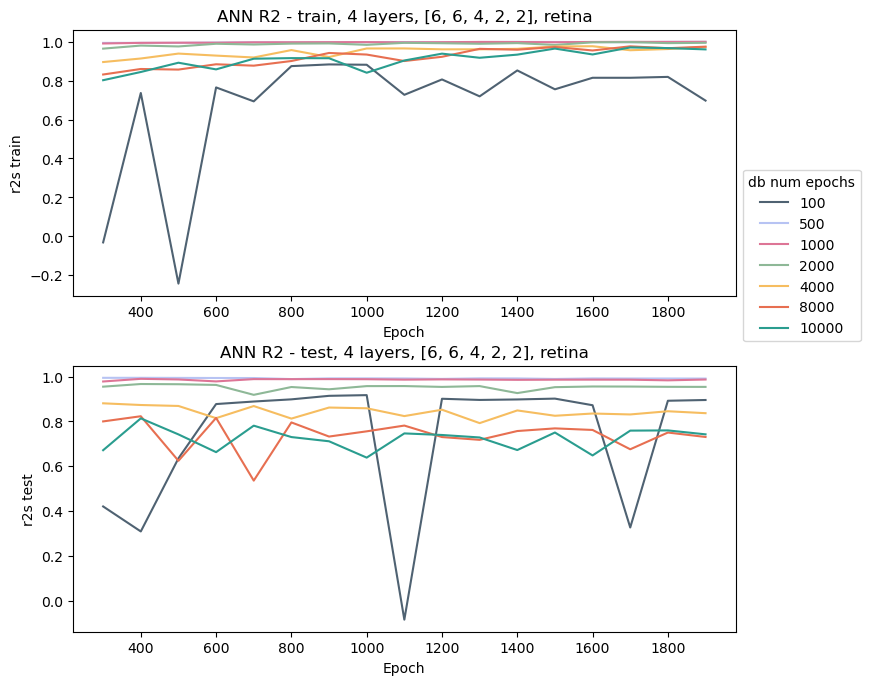

In [11]:
plot_two_ann_metrics_train_test(
    x_metric_name='Epoch',
    y_metric_name='r2s',
    all_result_list=all_ann_reg_res,
    epochs=epochs,
    dims=dims,
    time_str=time_str,
    task=task,
    plot_path=plot_path,
    title_addition=f'{num_layers} layers',
    start_ind=300,
    jump=100,
)

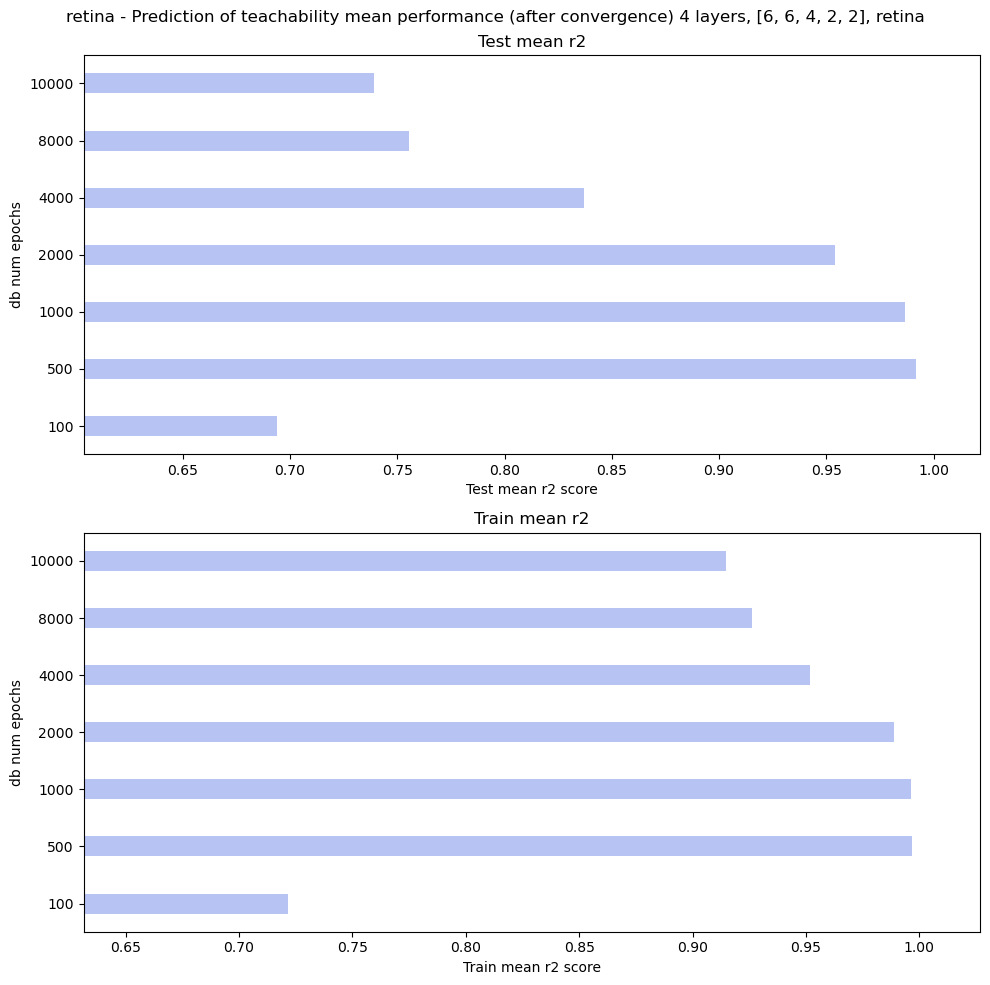

In [5]:
plot_mean_r2_bars(
        metric_name= 'r2s',
        all_result_list=all_ann_reg_res,
    epochs=epochs,
    dims=dims,
    time_str=time_str,
    task=task,
    plot_path=plot_path,
    title_addition=f'{num_layers} layers, ',
start_ind = 300,
)
